In [9]:
import requests
import pandas as pd
import json

In [10]:
# documentation - https://github.com/dmarx/psaw

In [11]:
from psaw import PushshiftAPI

api = PushshiftAPI()

In [12]:
import datetime as dt

start_epoch=int(dt.datetime(2018, 9, 16).timestamp())
start_epoch

1537070400

In [13]:
r = 'https://api.pushshift.io/reddit/comment/search/'

In [14]:
s_params = {
    'author': 'FantasyMod',
    'filter': ['id','title', 'created_utc'],
    'limit': 5}

In [15]:
s = 'https://api.pushshift.io/reddit/search/submission/'

In [16]:
response = requests.get(s, s_params)

In [17]:
content = response.json()

In [18]:
content['data']

[{'created_utc': 1537156802,
  'id': '9gh3uz',
  'title': 'OFFICIAL MONDAY NIGHT MIRACLE THREAD'},
 {'created_utc': 1537154698,
  'id': '9ggw0n',
  'title': 'OFFICIAL SUNDAY NIGHT POSTGAME THREAD'},
 {'created_utc': 1537154019,
  'id': '9ggte7',
  'title': 'OFFICIAL SUNDAY NIGHT POSTGAME THREAD'},
 {'created_utc': 1537142698,
  'id': '9gfhlr',
  'title': 'OFFICIAL SUNDAY NIGHT GAME THREAD'},
 {'created_utc': 1537140603,
  'id': '9gf8ya',
  'title': 'OFFICIAL SUNDAY AFTERNOON POSTGAME THREAD'}]

In [19]:
u = 1537142698

In [20]:
time.localtime(u)

NameError: name 'time' is not defined

In [21]:
import time

time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(u))


'2018-09-16 20:04:58'

In [22]:
content['data']

[{'created_utc': 1537156802,
  'id': '9gh3uz',
  'title': 'OFFICIAL MONDAY NIGHT MIRACLE THREAD'},
 {'created_utc': 1537154698,
  'id': '9ggw0n',
  'title': 'OFFICIAL SUNDAY NIGHT POSTGAME THREAD'},
 {'created_utc': 1537154019,
  'id': '9ggte7',
  'title': 'OFFICIAL SUNDAY NIGHT POSTGAME THREAD'},
 {'created_utc': 1537142698,
  'id': '9gfhlr',
  'title': 'OFFICIAL SUNDAY NIGHT GAME THREAD'},
 {'created_utc': 1537140603,
  'id': '9gf8ya',
  'title': 'OFFICIAL SUNDAY AFTERNOON POSTGAME THREAD'}]

In [24]:
for entry in content['data']:
    print(entry['id'])

9gh3uz
9ggw0n
9ggte7
9gfhlr
9gf8ya


In [26]:
name = 'Eli Manning'

firstname = name.split(' ')[0]
lastname = name.split(' ')[1]
firstname, lastname

position = 'QB'

filter_list = [firstname, lastname, name, position]

In [27]:
params = {
    'subreddit': 'fantasyfootball',
    'q': '|'.join(filter_list) ,
    'size': 10,
    'link_id': '9gfhlr',
    'filter': 'body'
}

In [28]:
response = requests.get(r, params)

In [29]:
content = response.json()

In [30]:
content

{'data': [{'body': 'obj is hot and cold every year. dj has a new coach/qb/offense. '},
  {'body': 'Yup for anyone wondering why Odell only has 7 targets today, Manning threw 15 fucking checkdowns to Barkley tonight.'},
  {'body': 'Barkley has been beast, just a shitty QB and Oline '},
  {'body': 'Last year they have no obj or saquan and are ass. Give the giants two elite athletes and they’re still ass.\n\nCommon denominator? Goofy Manning \n\n'},
  {'body': 'That delay of game penalty...just trash all around. Too bad studs like Beckham and Barkley have to be stuck behind an awful Oline with a QB past his prime. '},
  {'body': "Gotta get him 40 touches a game and have no passing game. Bringing back the good ol' days. I fully look forward to Eli running an option offense next week, rolling out with Barkly on a QB keeper in the 4th quarter down 30 points, fake latteralling to juke out a corner and gaining 1 yard."},
  {'body': 'Manning has Barkley on his PPR team.'},
  {'body': 'On the br

In [31]:
content['data'][0]['body']

'obj is hot and cold every year. dj has a new coach/qb/offense. '

In [34]:
results = []
for comment in content['data']:
    results.append(comment['body'])
results

df = pd.DataFrame(results, columns=['Text'])

In [35]:
df

,Text
0,obj is hot and cold every year. dj has a new c...
1,Yup for anyone wondering why Odell only has 7 ...
2,"Barkley has been beast, just a shitty QB and O..."
3,Last year they have no obj or saquan and are a...
4,That delay of game penalty...just trash all ar...
5,Gotta get him 40 touches a game and have no pa...
6,Manning has Barkley on his PPR team.
7,On the bright side the giants can draft a qb w...
8,Cowboys fans hate him more than anyone else do...
9,Has to cross his fingers they draft a qb with ...


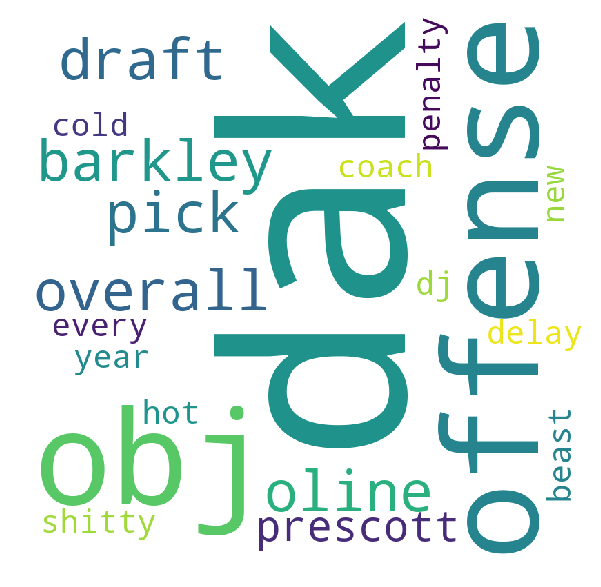

In [241]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

   
comment_words = ' '
stopwords = set(STOPWORDS) 
stopwords |= set(filter_list) 
stopwords.add('game')
    
# iterate through the DataFrame
for val in df.Text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10,
                max_words=20).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [242]:
# This link can help color positive vs. negative comments or words.  
# https://amueller.github.io/word_cloud/auto_examples/colored_by_group.html#sphx-glr-auto-examples-colored-by-group-py